# Neural Networks - Solutions

In this tutorial we will use Convolutional Neural Networks (CNN) for satellite image classification. 

We will try to see whether the images are either desert, cloudy, green area or water.

Before we classify images from a list of urls, we'll train a CNN.

## Packages

In [1]:
InstallPackages = False
if InstallPackages:
    !pip install pandas
    !pip install numpy
    !pip install os
    !pip install scikit-learn
    !pip install tensorflow
    !pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import requests
import itertools

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from io import BytesIO

## Seed

In [4]:
seed = 42

## Exercise 1 - Read the satellite images for training the Convolutional Neural Networks

Examine the satellite images for training the Convolutional Neural Networks and create a data frame of all images that can be found in the Data folder. 

Each item of the list must contain

* image_path,
* label

Use the data frame to read the images.

Split the images into test and training data.

In [5]:
# Create an empty dataframe
df = pd.DataFrame(columns=['image_path', 'label'])

In [6]:
# Define the labels/classes
labels = {'Images/cloudy' : 'Cloudy',
          'Images/desert' : 'Desert',
          'Images/green_area' : 'Green_Area',
          'Images/water' : 'Water',
           }

In [7]:
# Loop over the train, test, and val folders and extract the image path and label
for folder in labels:
    for image_name in os.listdir(folder):
        image_path = os.path.join(folder, image_name)
        label = labels[folder]
        df = df._append({'image_path': image_path, 'label': label}, ignore_index=True)

In [8]:
# Look at the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5631 entries, 0 to 5630
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  5631 non-null   object
 1   label       5631 non-null   object
dtypes: object(2)
memory usage: 88.1+ KB


In [9]:
#Look at the data
df.head()

,image_path,label
0,Images/cloudy\train_10021.jpg,Cloudy
1,Images/cloudy\train_10043.jpg,Cloudy
2,Images/cloudy\train_10070.jpg,Cloudy
3,Images/cloudy\train_10081.jpg,Cloudy
4,Images/cloudy\train_10096.jpg,Cloudy


In [10]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=seed)

## Exercise 2 - Pre-process the images

Examine a transformation to an image according to given parameters:

* rescale,
* shear_range,
* zoom_range
* horizontal_flip,
* rotation_range,
* vertical_flip,
* fill_mode

for the train set and just rescale the test set.

Next, use the data fram containing the filenames (with or without the extensions) column and a column which has the class names and directly read the images from the directory with their respective class names mapped.

In [11]:
# Pre-process the data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   rotation_range=45,
                                   vertical_flip=True,
                                   fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
#Read the images
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col="image_path",
                                                    y_col="label",
                                                    target_size=(255, 255),
                                                    batch_size=32,
                                                    class_mode="categorical")

test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                  x_col="image_path",
                                                  y_col="label",
                                                  target_size=(255, 255),
                                                  batch_size=32,
                                                  class_mode="categorical")

Found 4504 validated image filenames belonging to 4 classes.
Found 1127 validated image filenames belonging to 4 classes.


## Exercise 3 - Define the Convolutional Neural Network

Now, it's time to define the Convolutional Neural Network. 

In [13]:
model = Sequential()
model.add(Input(shape=(255, 255, 3)))  # Input layer with the desired shape
model.add(Conv2D(32, (3, 3), activation='relu'))  # First Conv layer
model.add(Conv2D(32, (3, 3), activation='relu'))  # Second Conv layer
model.add(MaxPooling2D(2, 2))  # First Max Pooling layer
model.add(Conv2D(64, (3, 3), activation='relu'))  # Third Conv layer
model.add(MaxPooling2D(2, 2))  # Second Max Pooling layer
model.add(Conv2D(128, (3, 3), activation='relu'))  # Fourth Conv layer
model.add(MaxPooling2D(2, 2))  # Third Max Pooling layer
model.add(Flatten())  # Flattening layer
model.add(Dense(128, activation='relu'))  # Dense layer
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(4, activation='softmax'))  # Output layer for 4 classes

In [14]:
#Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 253, 253, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 251, 251, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 125, 125, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 123, 123, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 59, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 107648)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      13,779,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,882,084 (52.96 MB)

 Trainable params: 13,882,084 (52.96 MB)

 Non-trainable params: 0 (0.00 B)

## Exercise 4 - Train the Convolutional Neural Network

Now, it's time to train the Convolutional Neural Network

In [15]:
#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
#train the model
history = model.fit(train_generator, epochs=5, validation_data=test_generator)

Epoch 1/5


C:\Users\Maximilian Andres\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/141 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.6082 - loss: 0.8883 - val_accuracy: 0.8163 - val_loss: 0.4352
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 118s 819ms/step - accuracy: 0.8071 - loss: 0.4590 - val_accuracy: 0.8172 - val_loss: 0.4326
Epoch 3/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 112s 780ms/step - accuracy: 0.8400 - loss: 0.3916 - val_accuracy: 0.8749 - val_loss: 0.2990
Epoch 4/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 112s 782ms/step - accuracy: 0.8094 - loss: 0.4595 - val_accuracy: 0.8580 - val_loss: 0.3454
Epoch 5/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 112s 780ms/step - accuracy: 0.8461 - loss: 0.3946 - val_accuracy: 0.8075 - val_loss: 0.5724


In [17]:
#number of samples in the test data frame
num_samples = test_df.shape[0]
num_samples

1127

In [18]:
#evaluate the model
score = model.evaluate(test_generator)

36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 180ms/step - accuracy: 0.8262 - loss: 0.5048


In [19]:
history.history['loss']

[0.616783082485199,
 0.4225461483001709,
 0.38698214292526245,
 0.4513264000415802,
 0.37972503900527954]

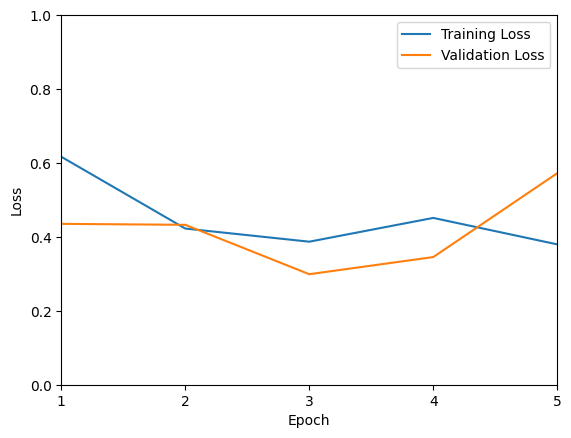

In [20]:
# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlim(xmin=0, xmax=4)
plt.ylim(ymin=0, ymax=1)
plt.xticks(ticks = [0,1,2,3,4], labels = [1, 2, 3,4,5])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

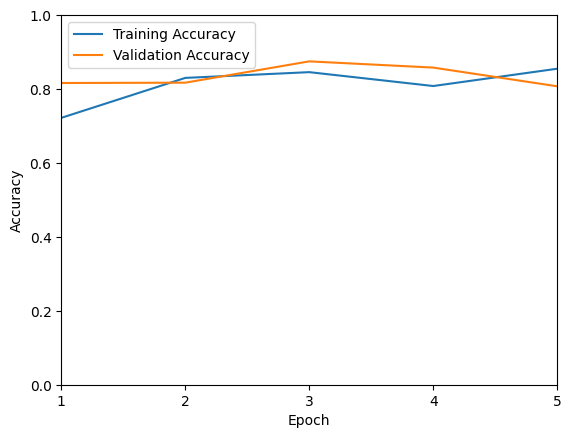

In [21]:
# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlim(xmin=0, xmax=4)
plt.ylim(ymin=0, ymax=1)
plt.xticks(ticks = [0,1,2,3,4], labels = [1, 2, 3,4,5])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
# Save it as a keras file
#model.save('Models/CNN.keras')

In [23]:
# Load the model
#model = load_model("Models/CNN.keras")

## Exercise 5 - Advanced Predictions From Images

Now, it's time to predict the category of images from the test data.

Before we predict the category of images from the test data using the CNN, we describe the process in more detail.

In [24]:
# Define the class names
class_names = ['Cloudy', 'Desert', 'Green_Area', 'Water']

In [25]:
# Load an image from the test set
img = load_img("Images/green_area/Forest_1768.jpg", target_size=(255, 255))

In [26]:
# Convert the image to an array
img_array = img_to_array(img)
img_array

array([[[33., 60., 69.],
        [33., 60., 69.],
        [33., 60., 69.],
        ...,
        [38., 65., 72.],
        [38., 65., 72.],
        [38., 65., 72.]],

       [[33., 60., 69.],
        [33., 60., 69.],
        [33., 60., 69.],
        ...,
        [38., 65., 72.],
        [38., 65., 72.],
        [38., 65., 72.]],

       [[33., 60., 69.],
        [33., 60., 69.],
        [33., 60., 69.],
        ...,
        [38., 65., 72.],
        [38., 65., 72.],
        [38., 65., 72.]],

       ...,

       [[33., 57., 67.],
        [33., 57., 67.],
        [33., 57., 67.],
        ...,
        [31., 58., 65.],
        [31., 58., 65.],
        [31., 58., 65.]],

       [[33., 57., 67.],
        [33., 57., 67.],
        [33., 57., 67.],
        ...,
        [31., 58., 65.],
        [31., 58., 65.],
        [31., 58., 65.]],

       [[33., 57., 67.],
        [33., 57., 67.],
        [33., 57., 67.],
        ...,
        [31., 58., 65.],
        [31., 58., 65.],
        [31., 58., 65.]]

In [27]:
#shape of the array
img_array.shape

(255, 255, 3)

In [28]:
# Normalize the image pixel values to the range [0, 1]
img_array = img_array / 255.0
img_array

array([[[0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        ...,
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295]],

       [[0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        ...,
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295]],

       [[0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        ...,
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295]],

       ...,

       [[0.12941177, 0.22352941, 0.2627451 ],
        [0.12941177, 0.22352941, 0.2627451 ],
        [0.12941177, 0

In [29]:
#re-shape the image
img_array = np.reshape(img_array, (1, 255, 255, 3))

In [30]:
# Get the model predictions
predictions = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [31]:
# Get the class index with the highest predicted probability
class_index = np.argmax(predictions[0])

In [32]:
# Get the predicted class label
predicted_label = class_names[class_index]

In [33]:
#Get the predicticed probability of the class with the highest predictices probability
predicted_probability = predictions[0][np.argmax(predictions[0])]

In [34]:
#print the prediction
print("The image is predicted to be '{}' ".format(predicted_label)+'with the probability of {}'.format(predicted_probability)+' percent.')

The image is predicted to be 'Green_Area' with the probability of 0.9565876722335815 percent.


Now, it's time to predict the category of the test images

In [35]:
#predict the category of the test images
predictions = model.predict(test_generator)

36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step


In [36]:
predictions

array([[2.7032122e-03, 4.9219932e-05, 5.9909940e-01, 3.9814827e-01],
       [1.0180010e-01, 8.9819992e-01, 9.0277474e-10, 2.8962941e-09],
       [6.9284099e-03, 2.4402577e-04, 7.0453331e-02, 9.2237425e-01],
       ...,
       [1.8761294e-04, 6.9476954e-08, 9.7444236e-01, 2.5369924e-02],
       [5.7880644e-04, 1.5820343e-06, 9.2096835e-01, 7.8451291e-02],
       [1.0155983e-02, 2.7967573e-04, 8.0189264e-01, 1.8767166e-01]],
      dtype=float32)

In [37]:
#get the predicted category of the test images
predicted_labels = np.argmax(predictions, axis=1)

In [38]:
predicted_labels

array([2, 1, 3, ..., 2, 2, 2], dtype=int64)

In [39]:
#get the actual category of the test images
actual_labels = test_generator.classes

In [40]:
#actual_labels

In [41]:
#Build the confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)

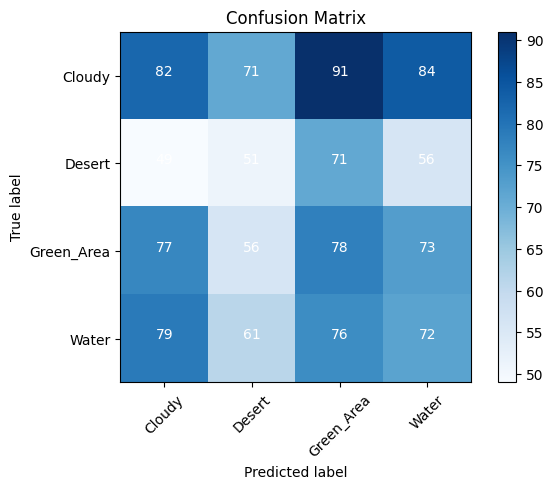

In [42]:
# Plot the confusion matrix as an image
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Add the class labels to the plot
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add values to the plot
threshold = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black")

plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

## Exercise 6 - Advanced Predictions From URLs

Examine the predictive power of the Convolutional Neural Networks and predict the category from URLs linking to images. The URLs are

* https://eoimages.gsfc.nasa.gov/images/imagerecords/92000/92263/goldstone_oli_2018124_lrg.jpg
* https://i.natgeofe.com/n/54c007c9-50e5-4cf5-83dc-978a35a4373a/68576_16x9.jpg

Write a function predicting the category using the Convolutional Neural Networks printing

* the category with the highest probability
* the probability of the category with the highest probability

for every URL in the list and returning a data frame containing for every URL in the list

* the URL,
* the category with the highest probability, and
* the probability of the category with the highest probability.

In [43]:
#Put the URLs into a list
url_list = ['https://eoimages.gsfc.nasa.gov/images/imagerecords/92000/92263/goldstone_oli_2018124_lrg.jpg',
            'https://i.natgeofe.com/n/54c007c9-50e5-4cf5-83dc-978a35a4373a/68576_16x9.jpg',
           ]

In [44]:
#Write the advanced predictions from URLs function
def satellite_image_classification(model, url_list):

    """
    
    This function predicts the categories of images from URLs using a CNN model.

    Args:
        model: The CNN model used for prediction.
        urls: List of URLs pointing to the images.

    Returns:
        DataFrame: A DataFrame containing the URL, the predicted category with the highest probability, and the probability.
        
    """

    # define the class names
    class_names = ['Cloudy', 'Desert', 'Green_Area', 'Water']

    # return results
    results = []

    # go to work
    for url in url_list:
            try:
                # Download the image
                response = requests.get(url)
                img_bytes = BytesIO(response.content)

                # Preprocess the image
                img = image.load_img(img_bytes, target_size=(255, 255))
                img = image.img_to_array(img)
                img = img / 255.0
                img = np.reshape(img, (1, 255, 255, 3))
    
                # Predict
                predictions = model.predict(img)
    
                # Extract the class index with the highest probability
                class_index = np.argmax(predictions[0])

                # Get the predicted class label
                predicted_label = class_names[class_index]

                #Get the predicticed probability of the class with the highest predictices probability
                predicted_probability = predictions[0][np.argmax(predictions[0])]

                #print the result
                print(f"{url} The image is predicted to be '{predicted_label}' with the probability '{predicted_probability}'")

                #append to the results
                results.append({'URL': url, 'Category': predicted_label, 'Probability': predicted_probability})
            except Exception as e:
                results.append({'URL': url, 'Category': None, 'Probability': None})
                print(f"Error processing URL {url}: {e}")
    
    return pd.DataFrame(results)



In [45]:
satellite_image_classification(model = model, url_list = url_list)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
https://eoimages.gsfc.nasa.gov/images/imagerecords/92000/92263/goldstone_oli_2018124_lrg.jpg The image is predicted to be 'Desert' with the probability '0.8588838577270508'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
https://i.natgeofe.com/n/54c007c9-50e5-4cf5-83dc-978a35a4373a/68576_16x9.jpg The image is predicted to be 'Desert' with the probability '0.8314195871353149'


,URL,Category,Probability
0,https://eoimages.gsfc.nasa.gov/images/imagerec...,Desert,0.858884
1,https://i.natgeofe.com/n/54c007c9-50e5-4cf5-83...,Desert,0.831420
